# Example self-absorption baseline fitting

In [1]:
# load basic modules and packages
import os
import numpy as np
from astropy.io import fits
from astropy import units as u

## Step 1: Generating training set

In [2]:
# load astroSABER module for preparing training set
from astroSABER.prepare_training import saberPrepare

Step 1: create training data that are generated from 'pure' emission spectra (test_data) with randomly generated (but known) self-absorption features

In [3]:
# HI data to extract training data from
filename = 'HI_THOR_test_cube.fits'

In [4]:
# initialize training set preparation
prep = saberPrepare(fitsfile=filename)

In [5]:
# set the size of the training set
prep.training_set_size = 50

In [6]:
# path to noise map (or universal noise value)
# prep.path_to_noise_map = os.path.join('.', 'dir', 'sub', '*.fits')
prep.noise = 4. # [K]

## the following settings are all the default values of astroSABER

# set the expected linewidth of self-absorption features; self-absorption features will be generated from this distribution
prep.mean_linewidth = 4. # FWHM [km/s]
prep.std_linewidth = 1. # standard deviation of the linewidth distribution [km/s]

# set the amplitudes of self-absorption features; self-absorption features will be generated from this distribution
prep.mean_amp_snr = 7. # mean SNR of amplitudes
prep.std_amp_snr = 1. # standard deviation of the SNR amplitude distribution

# set the number of self-absorption features; self-absorption features will be generated from this distribution
prep.mean_ncomponent = 2 # mean number of components
prep.std_ncomponent = 1 # standard deviation of the ncomponent distribution

##

prep.filename_out = 'training_data_for_HISA.pickle'

In [7]:
# you can always print the prep object along with all the keyword arguments you can adjust
# Other keyword arguments can be left as is
print(prep)

saberPrepare:
fitsfile: HI_THOR_test_cube.fits
training_set_size: 50
path_to_noise_map: None
path_to_data: .
mean_amp_snr: 7.0
std_amp_snr: 1.0
mean_linewidth: 4.0
std_linewidth: 1.0
mean_ncomponent: 2
std_ncomponent: 1
lam1: None
p1: None
lam2: None
p2: None
niters: 50
iterations_for_convergence: 3
noise: 4.0
add_residual: False
sig: 1.0
velo_range: 15.0
check_signal_sigma: 6.0
p_limit: None
ncpus: 1
suffix: 
filename_out: training_data_for_HISA.pickle
seed: 111



preparation
Done!

creating training data

Using 1 of 8 cpus


100%|██████████| 50/50 [00:00<00:00, 2028.29it/s]



SAVED FILE: 'training_data_for_HISA.pickle' in './astrosaber_training'

Plotting...


100%|██████████| 20/20 [00:00<00:00, 46.92it/s]



SAVED FILE: 'training_data_for_HISA_20.pdf' in 'astrosaber_training/plots'


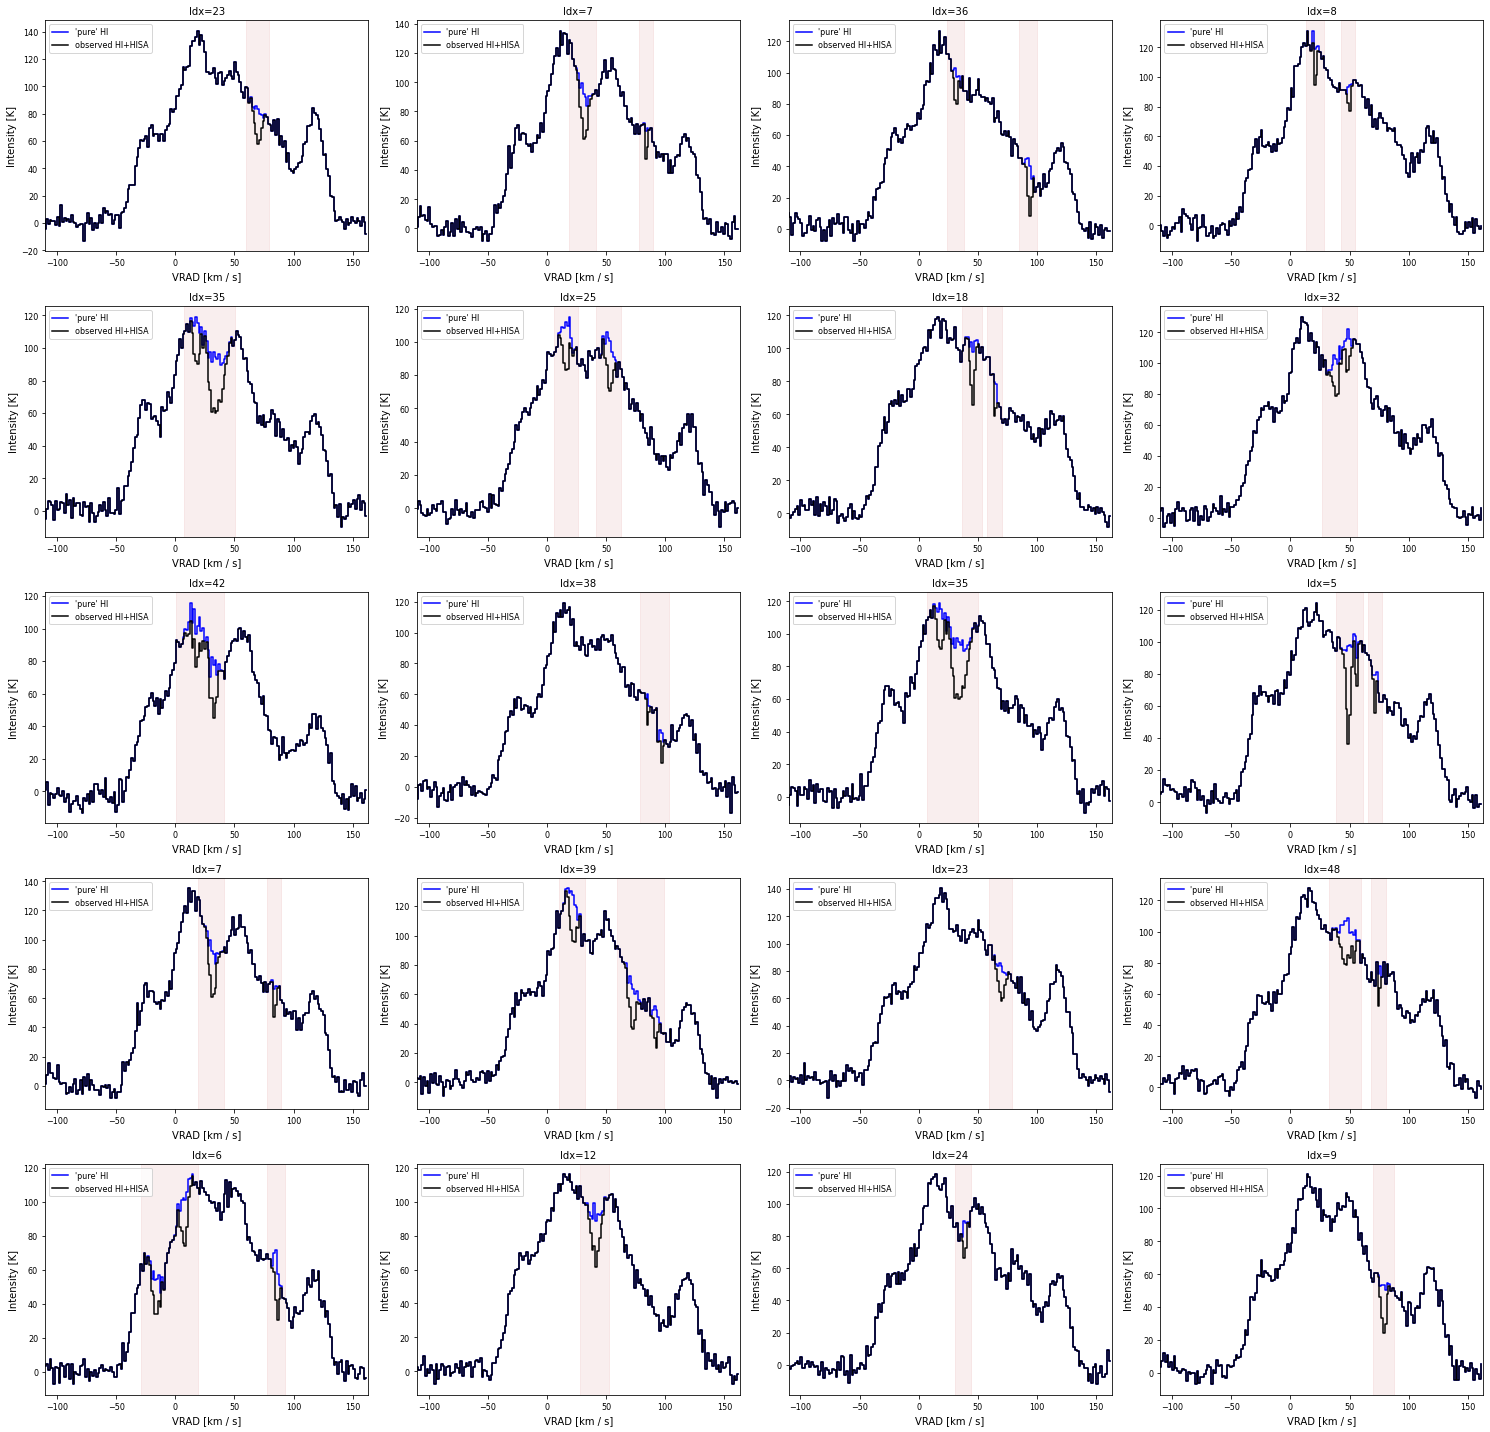

In [8]:
# this runs the training set extraction
prep.prepare_training()
'''
The output will be one .pickle file, saved in the 'astrosaber_training' directory,
and one .pdf plot of 20 example spectra, saved in the 'astrosaber_training/plots' directory.
The .pickle file contains the training_data (i.e., emission spectra with self-absorption),
test_data ('real' emission spectra that is to be recovered),
the generated hisa spectra,
and information about their properties, signal ranges, etc.
''';

## Step 2: Optimization of smoothing parameters

In [9]:
# load astroSABER module for optimization
from astroSABER.training import saberTraining

Step 2: use training and test data obtained in Step 1 to find optimal smoothing parameters

In [10]:
# data to use as training and test data
path_to_data = 'astrosaber_training'
filename = 'training_data_for_HISA.pickle'

In [11]:
# initialize optimization routine
train = saberTraining(pickle_file=filename, path_to_data=path_to_data)

In [12]:
# you can adjust the number of cpus to use
train.ncpus = 4

In [16]:
# set the initial guesses for the smoothing parameters (better to start low rather than high)
train.lam1_initial = 1.50
train.lam2_initial = 1.00

Again, let's print the keyword arguments of the training object

In [17]:
print(train)

saberTraining:
pickle_file: training_data_for_HISA.pickle
path_to_data: astrosaber_training
iterations: 100
phase: two
lam1_initial: 1.5
p1: 0.9
lam2_initial: 1.0
p2: 0.9
weight_1: 0.0
weight_2: 0.0
lam1_bounds: [0.1, 10.0]
lam2_bounds: [0.1, 10.0]
MAD: 0.03
window_size: 10
eps_l1: 0.1
eps_l2: 0.1
learning_rate_l1: 0.25
learning_rate_l2: 0.25
mom: 0.3
get_trace: False
niters: 50
iterations_for_convergence: 3
add_residual: True
sig: 1.0
velo_range: 15.0
check_signal_sigma: 6.0
p_limit: 0.02
ncpus: 4
suffix: 
filename_out: None
seed: 111


Most of these arguments can be left like this, or should only be modified with caution!


preparation
Done!

Optimizing smoothing parameters

iter 0: red.chi2=1.96, [lam1, lam2]=[1.500, 1.000], [p1, p2]=[0.900, 0.900], mom=[0.00, 0.00]  (Convergence testing begins in 20 iterations)

iter 1: red.chi2=1.97, [lam1, lam2]=[1.494, 1.026], [p1, p2]=[0.900, 0.900], mom=[-0.00, 0.01]  (Convergence testing begins in 19 iterations)

iter 2: red.chi2=1.96, [lam1, lam2]=[1.475, 0.948], [p1, p2]=[0.900, 0.900], mom=[-0.01, -0.02]  (Convergence testing begins in 18 iterations)

iter 3: red.chi2=1.97, [lam1, lam2]=[1.447, 0.988], [p1, p2]=[0.900, 0.900], mom=[-0.01, 0.01]  (Convergence testing begins in 17 iterations)

iter 4: red.chi2=1.96, [lam1, lam2]=[1.430, 0.967], [p1, p2]=[0.900, 0.900], mom=[-0.01, -0.01]  (Convergence testing begins in 16 iterations)

iter 5: red.chi2=1.97, [lam1, lam2]=[1.405, 1.007], [p1, p2]=[0.900, 0.900], mom=[-0.01, 0.01]  (Convergence testing begins in 15 iterations)

iter 6: red.chi2=1.97, [lam1, lam2]=[1.417, 0.960], [p1, p2]=[0.900, 0.900], mom=[0.00, 

100%|██████████| 50/50 [00:01<00:00, 39.04it/s]



SAVED UPDATED PICKLE FILE: 'training_data_for_HISA_astrosaber_fit.pickle' in 'astrosaber_training'

Plotting...


100%|██████████| 20/20 [00:00<00:00, 38.57it/s]



SAVED FILE: 'training_data_for_HISA_astrosaber_fit_20.pdf' in 'astrosaber_training/plots'


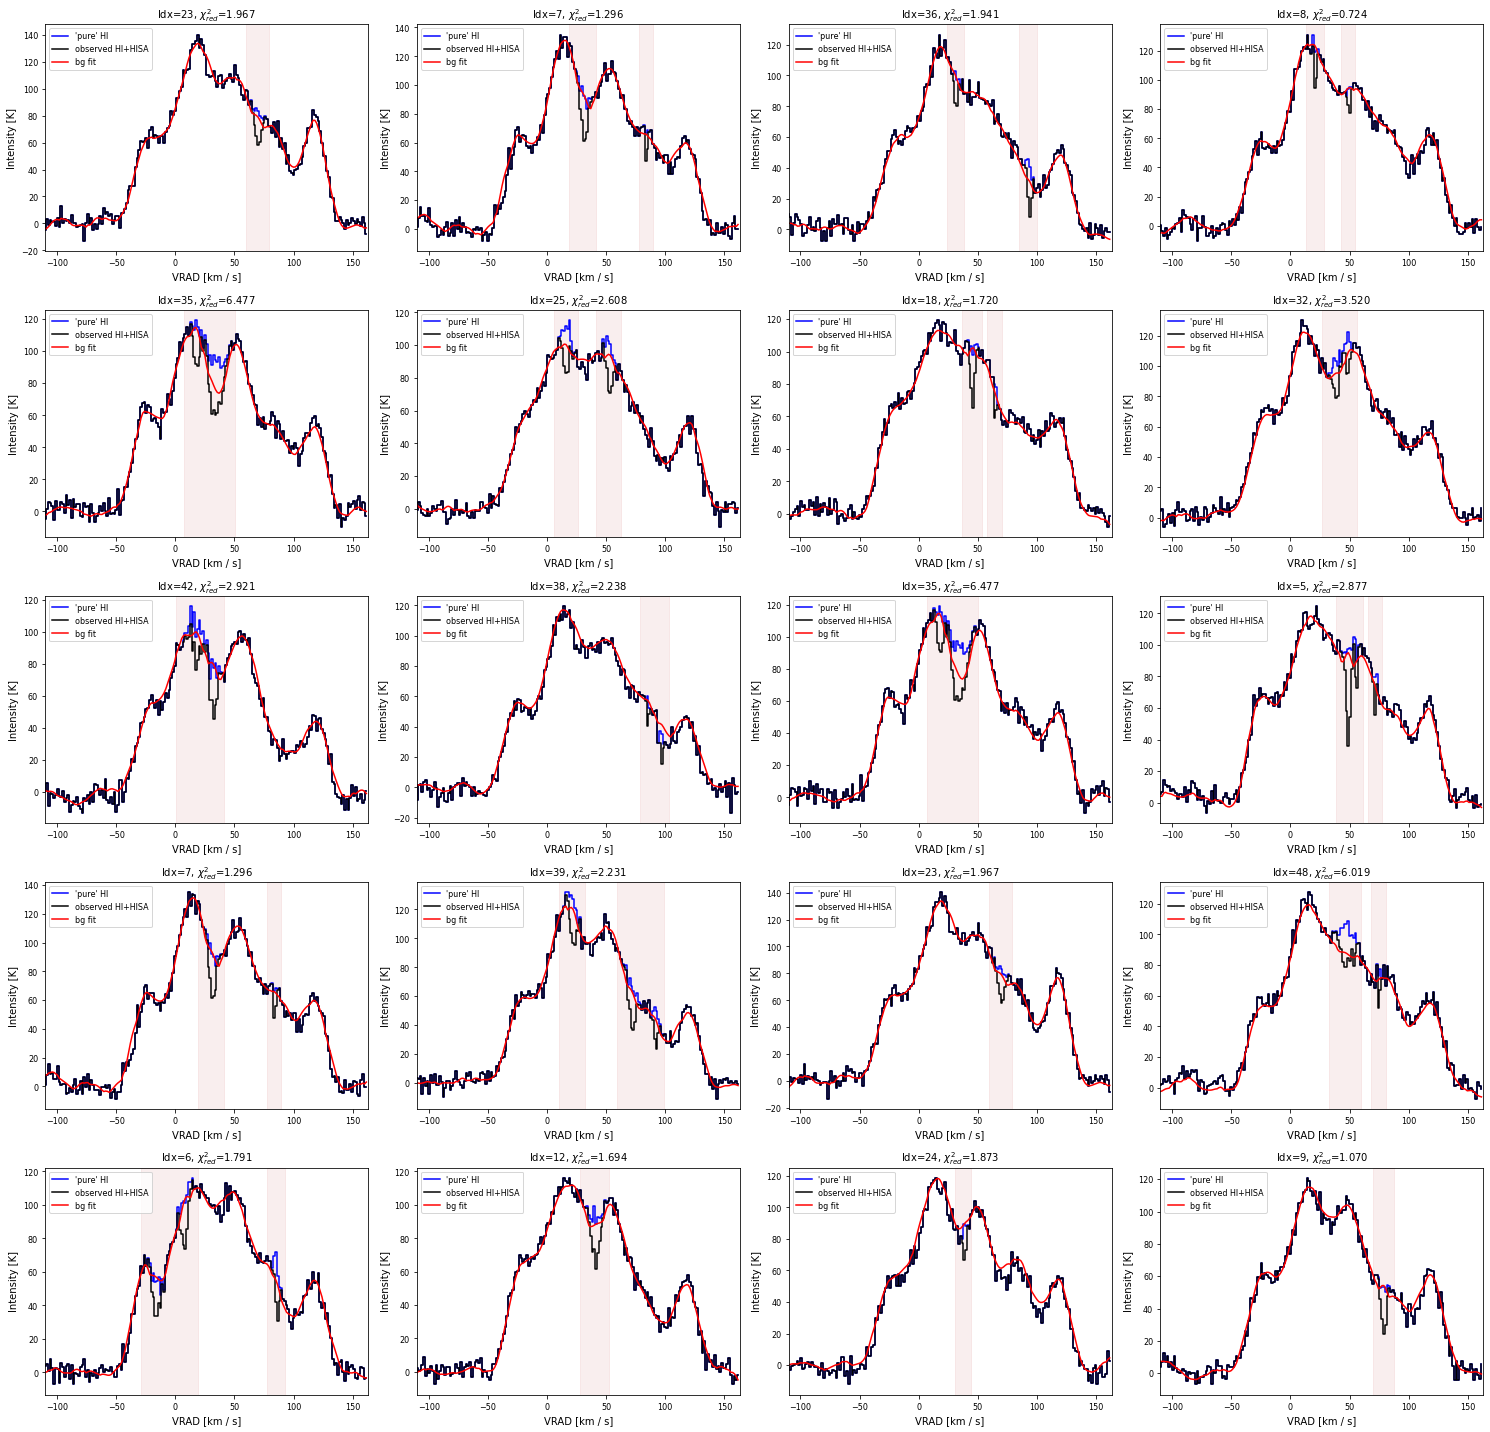

In [18]:
# this runs the optimization routine
train.training()

## Step 3: Run self-absorption extraction

In [19]:
# load astroSABER module for self-absorption extraction
from astroSABER.hisa import HisaExtraction
from astroSABER.plotting import plot_spectra

Step 3: run the self-absorption extraction with optimal smoothing parameters obtained in Step 2

In [20]:
# HI data to extract HI self-absorption from
image_HI = 'HI_THOR_test_cube.fits'

In [22]:
# initialize hisa extraction
hisa = HisaExtraction(fitsfile=image_HI)

In [23]:
# path to noise map (or universal noise value)
# hisa.path_to_noise_map = os.path.join('.', 'dir', 'sub', '*.fits')
hisa.noise = 4. # [K]

# put optimal asymmetric least squares smoothing parameters here
hisa.lam1 = 1.402
hisa.lam2 = 0.982

# maximum number of iterations (this limit is usually reached for strong continuum sources)
hisa.niters = 50

In [24]:
# you can adjust the number of cpus to use
hisa.ncpus = 4

In [25]:
# this runs the hisa extraction routine
hisa.saber()
'''
The output will be four (three if output_flags = False) files:
hisa background spectrum (.fits)
hisa spectrum (.fits)
number of iterations needed (.fits); good to check for contamination by continuum or noisy pixels
(optional) map of flags (.fits); 1: good pixels, 0: flagged spectra that did not meet convergence criteria or were discarded due to missing signal
''';


preparation
Done!

hisa extraction

Asymmetric least squares fitting in progress...

Using 4 of 8 cpus


100%|██████████| 10.0k/10.0k [01:20<00:00, 124spec/s] 



Unraveling data and writing into cubes...


100%|██████████| 10.0k/10.0k [00:00<00:00, 105kspec/s]


Done!

SAVED FILE: 'HI_THOR_test_cube_aslsq_bg_spectrum.fits' in '.'

SAVED FILE: 'HI_THOR_test_cube_HISA_spectrum.fits' in '.'

SAVED FILE: 'HI_THOR_test_cube_number_of_iterations.fits' in '.'

SAVED FILE: 'HI_THOR_test_cube_flags.fits' in '.'



Plotting...


100%|██████████| 9/9 [00:00<00:00, 16.99it/s]



SAVED FILE: 'spectra_astroSABER.pdf' in '.'


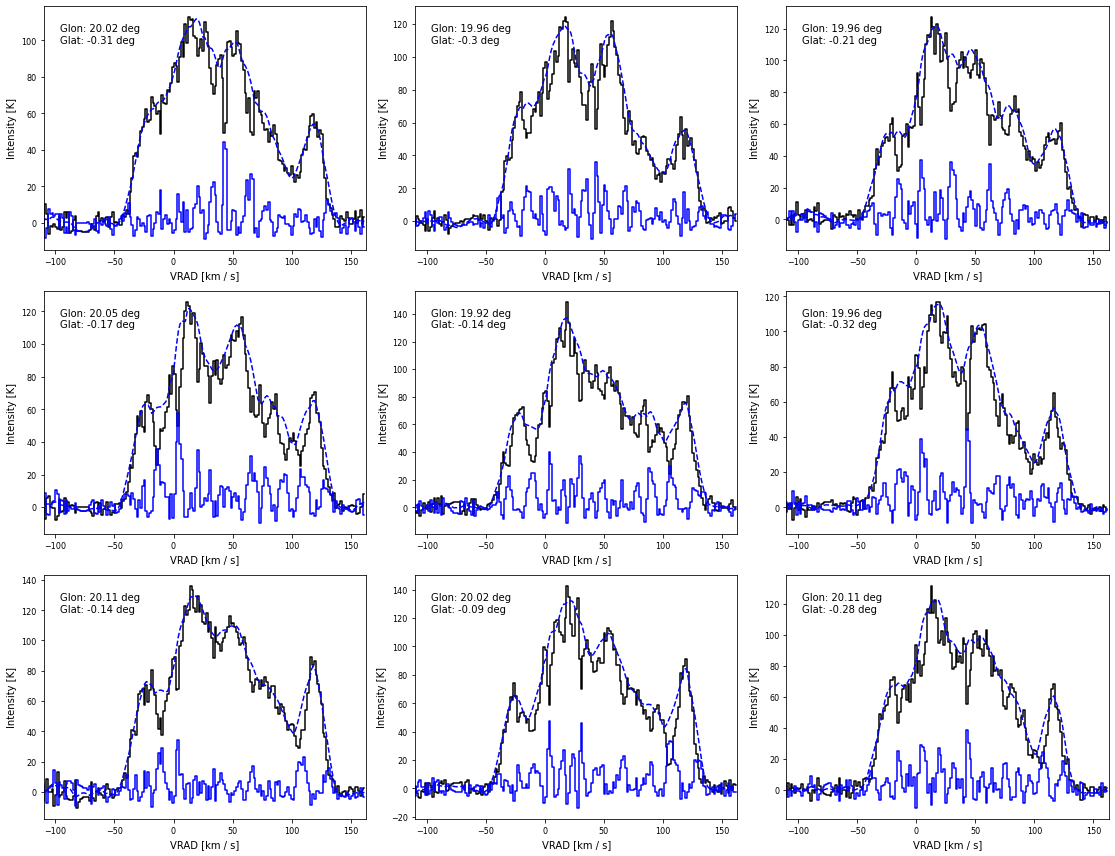

In [26]:
# plot some example spectra at random positions; or give it some coordinates as array; by default the spectra are averaged over one beam size
# coords = np.loadtxt('coords.txt') #to plot spectra at these positions: plot_spectra(coordinates=coords)
fitsfiles = ['HI_THOR_test_cube.fits', 'HI_THOR_test_cube_aslsq_bg_spectrum.fits', 'HI_THOR_test_cube_HISA_spectrum.fits']
plot_spectra(fitsfiles, outfile='spectra_astroSABER.pdf', coordinates=None, n_spectra=9, velocity_range=[-110,163])